In [ ]:
# default_exp datasets

# datasets

> Set of functions used to access the french text datasets.

External dependencies :
> pip install numpy

> pip install pandas

> pip install pyarrow

Configure tabular data display :

In [ ]:
# export
import numpy as np
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 50

# French datasets for Natural Language Processing

In [ ]:
# export
from frenchtext.core import *

The config object from frenchtext.core defines the directory where the datasets will be stored if you choose to download them :

In [ ]:
config.datasets

PosixPath('/home/laurent/.frenchtext/datasets')

You can change the default location if needed :
> config["datasets_path"] = "/var/tmp"

## 1.1 List datasets

In [ ]:
# export
def list_datasets():
    return pd.read_csv(config.libdata /"datasets"/"datasets.csv",sep=';')
    
datasetsdf = list_datasets()

In [ ]:
datasetsdf

,Dataset,DatasetFile,Website,Url,Scope,UrlsFile,Pages,Words
0,Assurance,assurance,4,https://www.afer.fr/,domain,afer,148,66498
1,Assurance,assurance,5,https://www.ag2rlamondiale.fr/,domain,ag2rlamondiale,2683,1030393
2,Assurance,assurance,6,https://www.agpm.fr/,domain,agpm,267,82637
3,Assurance,assurance,7,https://www.amaguiz.com/,domain,amaguiz,706,314384
4,Assurance,assurance,10,https://www.aviva.fr/,domain,aviva,2501,792475
...,...,...,...,...,...,...,...,...
149,Wikipedia,wikipedia-4,101,https://dumps.wikimedia.org/frwiki/latest/300000,path,dumps-wikimedia-3,91984,106415763
150,Wikipedia,wikipedia-4,102,https://dumps.wikimedia.org/frwiki/latest/400000,path,dumps-wikimedia-4,64029,73602244
151,Wikipedia,wikipedia-5,102,https://dumps.wikimedia.org/frwiki/latest/400000,path,dumps-wikimedia-4,35821,42823357
152,Wikipedia,wikipedia-5,103,https://dumps.wikimedia.org/frwiki/latest/500000,path,dumps-wikimedia-5,99853,115271107


1) The text content of the main french websites in the domain of finance and business (+ wikipedia) were extracted in september 2019 using [nlptextdoc](https://github.com/laurentprudhon/nlptextdoc).

This extraction was done as "politely" as possible:
- extract only freely and publicly available content
- respect the robots.txt directives of each website (pages forbidden for indexing, maximum extraction rate)
- detect when websites use tools to prevent indexing (like Datadome) and abort the crawl

**IMPORTANT: The original authors of the websites own the copyright on all text blocks in this dataset.**

To be able to link each text block to its original author, we track the origin URL of each text block throughout the whole process.

**YOU CAN'T REUSE THE TEXT BLOCKS FOR ANY PURPOSE EXCEPT TRAINING A NATURAL LANGUAGE PROCESSING MODEL.**

See the new European copyright rules : [European Parliament approves new copyright rules for the internet](https://www.europarl.europa.eu/news/en/headlines/priorities/copyright/20190321IPR32110/european-parliament-approves-new-copyright-rules-for-the-internet)

"*The directive aims to make it easier for copyrighted material to be used freely through text and data mining, thereby removing a significant competitive disadvantage that European researchers currently face.*"

In [ ]:
print(f"=> {len(datasetsdf)-23} websites and {datasetsdf['Pages'].sum()} HTML pages")

=> 131 websites and 2564755 HTML pages


2) The text blocks were then:
- deduplicated to keep only distinct text blocks for each website (forgetting part of the original document structure), 
- tagged (but not filtered) by language (using https://fasttext.cc/docs/en/language-identification.html),
- grouped in categories according to the main theme of the original website,
- split in [Pandas](https://pandas.pydata.org/) dataframes of size < 2 GB.

In [ ]:
print(f"=> {len(datasetsdf['Dataset'].unique())} categories: {list(datasetsdf['Dataset'].unique())}")

=> 10 categories: ['Assurance', 'Banque', 'Bourse', 'Comparateur', 'Crédit', 'Forum', 'Institution', 'Presse', 'SiteInfo', 'Wikipedia']


In each dataframe, the text blocks were additionnaly **SHUFFLED IN A RANDOM ORDER** to make it very difficult to reconstruct the original articles (safety measure to help protect the copyrights of the authors).

The results of this second step can be downloaded in the *config.datasets* directory, as dataframes serialized in the [feather format](https://arrow.apache.org/docs/python/ipc.html?highlight=feather#feather-format), in files named according to the 'DatasetFile' column of the table above:
- ['DatasetFile'].dataset.feather

In [ ]:
print(f"=> {len(datasetsdf['DatasetFile'].unique())} dataset files: {list(datasetsdf['DatasetFile'].unique())}")

=> 19 dataset files: ['assurance', 'banque', 'bourse', 'comparateur', 'crédit', 'forum', 'institution', 'presse-1', 'presse-2', 'presse-3', 'presse-4', 'presse-5', 'presse-6', 'siteinfo', 'wikipedia-1', 'wikipedia-2', 'wikipedia-3', 'wikipedia-4', 'wikipedia-5']


The number of words in each text block was computed using the default french tokenizer from [spaCy](https://spacy.io/) v2.1.

This business-oriented dataset contains **2 billion french words**.

In [ ]:
print(f"=> Total number of words : {datasetsdf['Words'].sum()}")

=> Total number of words : 2008307510


The detailed contribution of each website (number of pages and number of french words kept after all filters) to each category can be studied in the datasetsdf table :

Here is a summary of the number of words contributed by each category **in millions**:

In [ ]:
np.floor(datasetsdf[["Dataset","Words"]].groupby(by="Dataset").sum()/1000000)

,Words
Dataset,
Assurance,12.0
Banque,20.0
Bourse,26.0
Comparateur,20.0
Crédit,1.0
Forum,152.0
Institution,4.0
Presse,963.0
SiteInfo,78.0


Detailed documentation for **list_datasets()** :

list_datasets() returns one row per dataset file.


Columns :

- Dataset : 10 categories ('Assurance', 'Banque', 'Bourse', 'Comparateur', 'Crédit', 'Forum', 'Institution', 'Presse', 'SiteInfo', 'Wikipedia')


- DatasetFile : 19 dataset file names, which should be passed to **read_dataset_file()** ('assurance', 'banque', 'bourse', 'comparateur', 'crédit', 'forum', 'institution', 'presse-1', 'presse-2', 'presse-3', 'presse-4', 'presse-5', 'presse-6', 'siteinfo', 'wikipedia-1', 'wikipedia-2', 'wikipedia-3', 'wikipedia-4', 'wikipedia-5')


- Website : [only used during extraction phase] unique id for each extraction job


- Url : base URL used to start crawling the website (with additional parameters when the crawl result was too big and needed to be split in several dataset files, ex : https://dumps.wikimedia.org/frwiki/latest/100000 => '/10000' was added at the end of the real base URL to register the fact that the corresponding dataset file contains the first 100000 pages of the wikipedia dump)


- Scope : the crawl starts at the base URL, ex : https://fr.wikipedia.org/wiki/Finance, and then is limited to one of 3 possible scopes : 'domain' = \*.wikipedia.org/\*, 'subdomain' : fr.wikipedia.org/\*, 'path' : fr.wikipedia.org/wiki/Finance/\*


- UrlsFile : name of the file where the original download URLs for each text block are tracked (used by the functions read_urls() and get_url_from_rowindex())


- Pages : number of pages extracted from this website


- Words : number of tokens extracted from this website (according to the default spaCy tokenizer for french), enables to see the contribution of each website to the aggregated dataset

## 1.2 Download datasets

In [ ]:
# export
def read_download_info():
    return pd.read_csv(config.libdata /"datasets"/"download_info.csv",sep=';')

downloaddf = read_download_info()

def download_all_datasets():
    for datasetfile in datasetsdf['DatasetFile'].unique():
        download_dataset_file(datasetfile)

import math
        
def download_dataset_file(datasetfile):
    row = downloaddf[downloaddf["DatasetFile"]==datasetfile].iloc[0]
    url = row["DownloadUrl"]
    size = row["FileSize"]
    print(f"Downloading dataset file : {datasetfile} ({math.floor(size/1024/1024)} MB)")
    download_url(url, config.datasets / (datasetfile+".dataset.feather"), size)
    print("Done")

In [ ]:
download_dataset_file("assurance")

Done


In [ ]:
!ls -l {config.datasets}

total 110656
-rw-rw-rw- 1 laurent laurent 91136056 Feb  9 16:34 assurance.dataset.feather


In [ ]:
download_all_datasets()

Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done


## 1.3 Read dataset files

In [ ]:
# export
def read_dataset_file(datasetfile):
    datasetdffile = config.datasets / (datasetfile+".dataset.feather")
    if(datasetdffile.exists()):
        datasetdf = pd.read_feather(datasetdffile)
        print(f"Loaded dataframe for dataset {datasetfile} : {len(datasetdf)} text blocks")
        return datasetdf
    else:
        raise Exception(f"No dataframe for dataset {datasetfile}")

In [ ]:
datasetdf = read_dataset_file("assurance")

Loaded dataframe for dataset assurance : 563613 text blocks


In [ ]:
datasetdf

,Website,DocId,DocEltType,DocEltCmd,NestingLevel,Text,Lang,Words,Unique
0,11,22332,ListItem,Text,2,5 tournages catastrophe pour un assureur,fr,6,True
1,74,710,Section,Start,1,Tout connaitre sur la nouvelle formation post-...,fr,7,True
2,11,12082,TextBlock,Text,1,Votre Agent Mandataire AXA - Civry Marie Claud...,?,18,True
3,87,461,TextBlock,Text,4,60 ans et 4 mois,fr,5,True
4,7,200,TextBlock,Text,1,Mon devis sur mesure,fr,4,True
...,...,...,...,...,...,...,...,...,...
563608,138,255,Section,Start,2,Les autres pouvoirs de police,fr,5,True
563609,11,19483,TextBlock,Text,1,Yves Nicolau assurance Laon,?,4,True
563610,106,1644,ListItem,Text,3,Evènements sportifs,fr,2,True
563611,58,4155,Section,Start,1,Agence Groupama Chalon,?,3,True


The **dataset files** contain the same columns as the extraction files, with the following differences :

- Website column : unique **id of the website** (extraction job) from which the text block was extracted => can be used to join with the datasets list table


- contains only **content text blocks** (forgets all document structure DocElt)


- the text blocks are **shuffled in random order** : it is impossible to rebuild the original web pages from the dataset files (by design to protect the copyrights)


- only **unique** text blocks from each website are kept


- the **origin each text block is tracked** with the (Website,DocId) columns => can be used to join with the urls files (again by design to protect the copyrights)

**Note** : before using a dataset file to train a model, you should filter it on language and number of words.

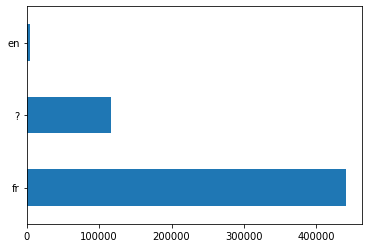

In [ ]:
datasetdf["Lang"].value_counts()[:3].plot.barh()

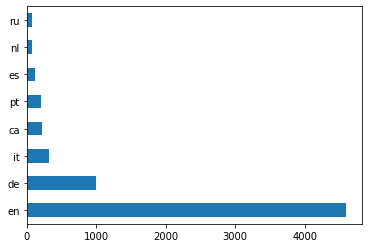

In [ ]:
datasetdf["Lang"].value_counts()[2:10].plot.barh()

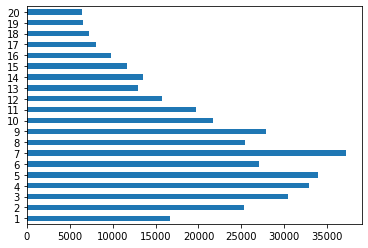

In [ ]:
datasetdf["Words"].value_counts().sort_index()[:20].plot.barh()

In [ ]:
datasetdf[datasetdf["Words"]<7]["Words"].count()

166275

In [ ]:
datasetdf[(datasetdf["Words"]>=7) & (datasetdf["Words"]<20)]["Words"].count()

217568

In [ ]:
datasetdf[(datasetdf["Words"]>=20) & (datasetdf["Words"]<100)]["Words"].count()

166004

In [ ]:
datasetdf[datasetdf["Words"]>=100]["Words"].count()

13766

## 1.4 Read URLs files

In [ ]:
# export
def read_urls_file(website):
    if isinstance(website,int):
        website = datasetsdf.loc[datasetsdf["Website"] == website,"UrlsFile"].values[0]
    if not isinstance(website,str):
         raise Exception("website param should be int or str")
    urlsdffile = config.datasets / (website+".urls.dataframe.feather")
    if(urlsdffile.exists()):
        urlsdf = pd.read_feather(urlsdffile)
        print(f"Loaded urls dataframe for website {website} : {len(urlsdf)} urls")
        return urlsdf
    else:
        raise Exception(f"No urls dataframe for website {website}")

During each website extraction, a corresponding **urls file** was created to track the urls and stats of all documents included in the extraction.

Urls files can be read with the **read_urls_file()** function.

This function requires a unique parameter of two possible types :
- the unique id of each extraction job = 'Website' column returned by list_datasets()
- the name of the corresponding extraction file = 'UrlsFile' column returned by list_datasets()

In [ ]:
urlsdf = read_urls_file("afer"), read_extraction_file("afer")

Exception: No urls dataframe for website afer

In [ ]:
urlsdf = read_urls_file(1)

Exception: No urls dataframe for website 10meilleuresbanques

In [ ]:
urlsdf.head()

,DocId,DocUrl,fr,?,en,es,de,Words,%fr,%de,%en,%es,%?
0,1,https://www.10meilleuresbanques.fr/about,278.0,7.0,0.0,0.0,0.0,285.0,0.975439,0.0,0.000000,0.000000,0.024561
1,2,https://www.10meilleuresbanques.fr/amexairfran...,966.0,93.0,49.0,0.0,0.0,1108.0,0.871841,0.0,0.044224,0.000000,0.083935
2,3,https://www.10meilleuresbanques.fr/amexfrreview,314.0,43.0,14.0,2.0,0.0,373.0,0.841823,0.0,0.037534,0.005362,0.115282
3,4,https://www.10meilleuresbanques.fr/anytimereview,490.0,25.0,0.0,0.0,0.0,515.0,0.951456,0.0,0.000000,0.000000,0.048544
4,5,https://www.10meilleuresbanques.fr/articles,380.0,11.0,3.0,0.0,0.0,394.0,0.964467,0.0,0.007614,0.000000,0.027919


Detailed documentation for **read_urls_file(website)** :

read_urls_file() returns one row per page extracted from a given website.

Columns :

- DocId : unique identifier for each page of the website, same as 'DocId' column in extraction file


- DocUrl : ansolute url (with query string) from which the page contents were extracted


- fr/en/es/de/? : number of words in text blocks for each language


- Words : total number of words in the text block of this page


- %fr/%en/%es/%de/%? : % words in text blocks of the page for each language (can be used to filter datasets)

## 1.4 Utility functions to use dataset files

### Filter and iterate over the rows of a dataset file

In [ ]:
def get_rows_from_datasetdf(datasetdf, minwords=5, maxwords=None, lang=None):
    condition = datasetdf.index>=0
    if isinstance(minwords,int):
        condition = condition & (datasetdf["Words"] >= minwords)
    if isinstance(maxwords,int):
        condition = condition & (datasetdf["Words"] <= maxwords)
    if isinstance(lang,str):
        condition = condition & (datasetdf["Lang"] == lang)
    return datasetdf[condition].iterrows()

def show_first_rows(rowsiterator, count=5, skip=0):
    i=0
    for rowidx,row in rowsiterator:   
        i = i+1
        if(i <= skip): continue
        text = row["Text"]
        print(f"{rowidx} - {text}") 
        if(i >= skip+count): break

In [ ]:
rowsiterator = get_rows_from_datasetdf(datasetdf)
show_first_rows(rowsiterator, skip=5)

7 - De la même manière, lorsque l’acheteur est titulaire d’un diplôme de mécanique, les juges apprécieront sa qualité de « professionnel » et pourront rejeter sa demande. En effet, ils pourront estimer qu’il aurait dû ou pu déceler le problème rencontré ultérieurement.
9 - Lorsque vous souscrivez à une assurance classique, vous avez systématiquement le choix entre plusieurs formules, qui proposent différentes garanties. Et bien, concernant les assurances auto connectée, c’est pareil. Et ce n’est pas parce qu’il y a des réductions à la clé qu’il faut en oublier de vérifier les conditions du contrat auquel vous souscrivez !
10 - Même si c’est un budget important, il vaut mieux payer en une seule fois. En effet, le paiement mensuel revient plus cher car il occasionne des frais supplémentaires.
11 - Les agences Groupama à proximité de l'agence Olonzac
13 - Generali Vie applique ce transfert des plus-values latentes :


In [ ]:
rowsiterator = get_rows_from_datasetdf(datasetdf, minwords=None, maxwords=5, lang="?")
show_first_rows(rowsiterator,10)

12 - COORDONNEES
41 - 01 30 41 67 33
49 - Dmitriy G.
57 - Les atouts du Multisupport CONFIANCE
74 - 01XXL meribel hiver
76 - Garantie en cas de vol
87 - Par AXA, le 01/08/2016
96 - mgr@enderby.eu
127 - 18 place De Strasbourg
131 - Saint Gaudens


### Filter and iterate over the text blocks of a full dataset (across multiple files)

In [ ]:
def get_textblocks_from_dataset(dataset, minwords=5, maxwords=None, lang=None):
    for datasetfile in datasetsdf.loc[datasetsdf["Dataset"]==dataset,"DatasetFile"].unique():
        datasetdf = read_dataset_file(datasetfile)
        for rowidx,row in get_rows_from_datasetdf(datasetdf,minwords,maxwords,lang):
            yield row["Text"]
        
def show_first_textblocks(textiterator, count=5, skip=0):
    i=0
    for text in textiterator:   
        i = i+1
        if(i <= skip): continue
        print(f"{i} - {text}") 
        if(i >= (skip+count)): break

In [ ]:
textiterator = get_textblocks_from_dataset("Wikipedia", minwords=None, maxwords=10, lang="fr")
show_first_textblocks(textiterator,skip=2000,count=10)

Loaded dataframe for dataset wikipedia-1 : 2696546 text blocks
2001 - Maladie et mort [ modifier | modifier le code ]
2002 - La Rhodésie du Sud de Ian Smith
2003 - catastrophe , sur le Wiktionnaire
2004 - prix Nobel de chimie 2012
2005 - Informations pour « Marché des capitaux »
2006 - 22. Étienne V de Hongrie
2007 - Culture à Brême
2008 - 32 Suppression d'éléments non sourcés - paragraphe Pétrole#Production
2009 - Lois d'Eshnunna
2010 - lien Internet : http://florencedemeredieu.blogspot.fr/2011/07/louis-marin-jean-charles-blais-dessin.html


### Access a specific row - Retrieve the Url from which this text block was extracted

In [ ]:
def get_text_from_rowindex(datasetdf, rowidx):
    return datasetdf.iloc[rowidx]["Text"]

def get_url_from_rowindex(datasetdf, rowidx):
    row = datasetdf.iloc[rowidx]
    website = row["Website"]
    docid = row["DocId"]
    urlsdf = read_urls_file(int(website))
    url = urlsdf.loc[urlsdf["DocId"] == docid,"DocUrl"].values[0]
    return url

In [ ]:
get_text_from_rowindex(datasetdf,100)

'Les inondations de plaine : débordement de cours d’eau avec une durée d’immersion longue (prévisibles plusieurs jours ou heures à l’avance).'

In [ ]:
get_url_from_rowindex(datasetdf,100)

Loaded urls dataframe for website maif : 1023 urls


'https://www.maif.fr/conseils-prevention/risques-majeurs/inondation.html'

### Find text blocks with a specific char or substring

In [ ]:
def find_textblocks_with_chars(datasetdf, chars, count=100, ctxsize=20, wrap=False):
    if isinstance(chars,int): chars = chr(chars)
    textsWithWord = datasetdf[datasetdf["Text"].str.contains(chars,regex=False)]
    if count>0 and (textsWithWord["Text"].count()>count):
        textsWithWord = textsWithWord.sample(count)
    return textsWithWord["Text"].apply(lambda t: getContextAroundWord(t,chars,ctxsize,wrap))

def getContextAroundWord(text,word,ctxsize=20,wrap=False):
    idx = text.index(word)
    start = max(idx-ctxsize,0)
    padbefore = -min(idx-ctxsize,0)
    end = min(idx+len(word)+ctxsize,len(text))
    passage = text[start:end+1].replace(chr(160)," ")
    if(wrap):
        passage = passage.replace(word,"["+word+"]")
    padafter = (2*ctxsize+len(word)+1)-len(passage)-padbefore
    if(wrap):
        padafter = padafter+2
    paddedpassage = (" "*padbefore) + passage + (" "*padafter)
    return paddedpassage

In [ ]:
find_textblocks_with_chars(datasetdf,"rétroviseur",count=20,ctxsize=15)

127872      également les rétroviseurs : ils sont dés
437500                les rétroviseurs intérieurs et 
10848       vitres et les rétroviseurs .             
526247      baissez votre rétroviseur en position de 
452835     , l’absence de rétroviseurs, une fuite imp
489866    \naussi dans le rétroviseur pour ne pas se 
126702     Malgré leurs 5 rétroviseurs et leurs camér
452871     pare-brises et rétroviseurs.              
163650     n du siège, du rétroviseur et des feux de 
561738     uvent dans ses rétroviseurs et sur les côt
375158     ant, moteur de rétroviseurs…              
466975                Des rétroviseurs vous donneront
6530       ubliez pas les rétroviseurs et les  phares
468658     moins dans vos rétroviseurs,              
20222      sont offerts : rétroviseurs électriques, c
317634     res, y compris rétroviseurs et feux       
433579     garde dans tes rétroviseurs avant d’ouvrir
454460      lorsque votre rétroviseur arrive au nivea
239710      y compris les ré

In [ ]:
find_textblocks_with_chars(datasetdf,64257,count=10,wrap=True)

489511    s besoins de diversi[ﬁ]cation de la clientèl
310030    e ou d’occasion, pro[ﬁ]tez du service gratui
175413    x besoins de diversi[ﬁ]cation des placements
530109    ’à leur élimination [ﬁ]nale , même lorsque l
265114    nt règlementaire et [ﬁ]nancier, nous accompa
267536    u le régime (du béné[ﬁ]ce) réel. Le premier 
337398    e 30 villes ont béné[ﬁ]cié de ces animations
523696    tion et de supports [ﬁ]nanciers comme les Fo
65567     et individuelle, con[ﬁ]rmant ainsi sa positi
264581     Ces préalables véri[ﬁ]és, les caractéristiq
Name: Text, dtype: object

In [ ]:
dfa = read_dataset_file("assurance")
dfb = read_dataset_file("banque")
dff = read_dataset_file("forum")
dfp = read_dataset_file("presse-1")
dfs = read_dataset_file("siteinfo")

Loaded dataframe for dataset assurance : 563613 text blocks
Loaded dataframe for dataset banque : 873783 text blocks
Loaded dataframe for dataset forum : 5433843 text blocks
Loaded dataframe for dataset presse-1 : 3810245 text blocks
Loaded dataframe for dataset siteinfo : 3089662 text blocks


In [ ]:
dfa = read_dataset_file("wikipedia-1")
dfb = read_dataset_file("wikipedia-2")
dff = read_dataset_file("wikipedia-3")
dfp = read_dataset_file("wikipedia-4")
dfs = read_dataset_file("wikipedia-5")

Loaded dataframe for dataset wikipedia-1 : 2696546 text blocks
Loaded dataframe for dataset wikipedia-2 : 2696546 text blocks
Loaded dataframe for dataset wikipedia-3 : 2696546 text blocks
Loaded dataframe for dataset wikipedia-4 : 2696546 text blocks
Loaded dataframe for dataset wikipedia-5 : 2696546 text blocks


In [ ]:
charcode = 11035

print(find_textblocks_with_chars(dfa,charcode,count=20,wrap=True))
print(find_textblocks_with_chars(dfb,charcode,count=20,wrap=True))
print(find_textblocks_with_chars(dff,charcode,count=20,wrap=True))
print(find_textblocks_with_chars(dfp,charcode,count=20,wrap=True))
print(find_textblocks_with_chars(dfs,charcode,count=20,wrap=True))

44298                         [⬛] 12 mois offerts pour
91532                         [⬛] 5000€ d’aide au fina
145415                        [⬛] 1 mois/an offert pen
156359                        [⬛] 0€ la couverture des
213240                        [⬛] De nouveaux soins pr
243550                        [⬛] Des soins mieux couv
349104                        [⬛] 1 mois/an offert à v
370709                        [⬛] 100% pratique l’appl
383387                        [⬛] Un réseau de soins p
555892                        [⬛] 0€ les consultations
Name: Text, dtype: object
55772                         [⬛] - Vous ne dépensez j
59388                         [⬛] - Pas une partie de 
80383                         [⬛] - Vous utilisez les 
169703     avez un maximum de [⬛], vous êtes plutôt un
255950    otre nombre d’★, de [⬛], de 0 et de ▲ et déc
256491                        [⬛] - optimiser ! Vous c
338788                        [⬛] - Vous vous en serve
368765                        [⬛] - Tou

In [ ]:
vocabdf = None
for datasetfile in datasetsdf["DatasetFile"].unique():
    print(datasetfile)
    vocabfile = rootdir / "datasets" / (datasetfile.lower()+".vocabnorm.feather")
    localdf = pd.read_feather(vocabfile)
    if vocabdf is None:
        vocabdf = localdf
    else:
        vocabdf = vocabdf.append(localdf)
    print(len(vocabdf))

assurance
157837
banque
389881
bourse
780055
comparateur
964556
crédit
1012704
forum
2880455
institution
2933330
presse-1
3772492
presse-2
4377253
presse-3
5053461
presse-4
5926706
presse-5
6664314
presse-6
7397873
siteinfo
7840435
wikipedia-1
9110430
wikipedia-2
10445740
wikipedia-3
11818417
wikipedia-4
13226953
wikipedia-5
14627873


In [ ]:
searchedChar = chr(218)
vocabdf[vocabdf["Word"].str.contains(searchedChar,regex=False)].sort_values(by="Count",ascending=False).head(100)

,Word,Count
82619,trÚs,31
116587,Újpest,29
124802,Újpest,27
124587,Ústí,27
125574,Ústí,26
124609,Último,26
147554,SDKÚ,20
153390,Újpest,20
150893,Úrsula,20
155979,RÚV,19


In [ ]:
get_text_from_rowindex(datasetdf,489511)

'Notre expertise financière assureur nous permet de proposer\xa0des supports d’investissement conçus pour les besoins de diversiﬁcation de la clientèle patrimoniale.'

In [ ]:
get_url_from_rowindex(datasetdf,489511)

Loaded urls dataframe for website ag2rlamondiale : 2847 urls


'https://www.ag2rlamondiale.fr/partenaire-epargne-patrimoniale/notre-expertise/les-assureurs-du-groupe'

# 2. Vocabulary and character sets

In [ ]:
def loadCharset(datasetfile):
    charsetfile = rootdir / "datasets" / (datasetfile.lower()+".charset.feather")
    chrdf = pd.read_feather(charsetfile)
    chrdf["Freq"] = 1000000*chrdf["Count"]/chrdf["Count"].sum()
    return chrdf

In [ ]:
refcs = loadCharset("banque")[["Code","Char","Freq"]]

In [ ]:
othercs = loadCharset("wikipedia-5")[["Code","Char","Freq"]]

In [ ]:
compcs = pd.merge(refcs, othercs, how='outer', on="Code",suffixes=('_ref', '_other')).fillna(0)
compcs

,Code,Char_ref,Freq_ref,Char_other,Freq_other
0,101,e,126532.0,e,129640
1,115,s,73340.0,s,70834
2,110,n,65645.0,n,67221
3,114,r,64666.0,r,63731
4,116,t,63524.0,t,61699
...,...,...,...,...,...
13497,4457,0,0.0,ᅩ,0
13498,4458,0,0.0,ᅪ,0
13499,120066,0,0.0,𝔂,0
13500,47204,0,0.0,롤,0


In [ ]:
compcs[(compcs["Freq_other"]>0) & (compcs["Freq_other"]>(2*compcs["Freq_ref"]))]

,Code,Char_ref,Freq_ref,Char_other,Freq_other
29,39,',4043.0,',8184
80,187,»,370.0,»,880
81,34,"""",360.0,"""",1909
82,171,«,330.0,«,862
104,249,ù,76.0,ù,184
110,61,=,33.0,=,103
111,91,[,30.0,[,235
112,93,],30.0,],232
113,8203,​,27.0,​,80
118,239,ï,19.0,ï,91


In [ ]:
chardf = loadCharset("assurance")
chardf

,Code,Count,Char,isAlpha,isDigit,isSpace,Percent,Name,Category,Subcategory,Block,Freq
0,101,7310604,e,True,False,False,12.817563,Latin Small Letter E,Letter,Lowercase,Basic Latin,128175.630780
1,115,4408841,s,True,False,False,20.547512,Latin Small Letter S,Letter,Lowercase,Basic Latin,77299.492105
2,110,3827371,n,True,False,False,27.257980,Latin Small Letter N,Letter,Lowercase,Basic Latin,67104.673178
3,114,3822984,r,True,False,False,33.960755,Latin Small Letter R,Letter,Lowercase,Basic Latin,67027.756621
4,97,3776597,a,True,False,False,40.582201,Latin Small Letter A,Letter,Lowercase,Basic Latin,66214.460895
...,...,...,...,...,...,...,...,...,...,...,...,...
303,131,1,,False,False,False,99.999993,Char 131,Other,Control,Latin-1 Supplement,0.017533
304,132,1,,False,False,False,99.999995,Char 132,Other,Control,Latin-1 Supplement,0.017533
305,537,1,ș,True,False,False,99.999996,Latin Small Letter S With Comma Below,Letter,Lowercase,Latin Extended-B,0.017533
306,375,1,ŷ,True,False,False,99.999998,Latin Small Letter Y With Circumflex,Letter,Lowercase,Latin Extended-A,0.017533


In [ ]:
mergeddf = None
freqcolslist=[]
countcolslist=[]
for datasetfile in datasetsdf["DatasetFile"].unique():
    chrdf = loadCharset(datasetfile)
    del chrdf["Percent"]
    if(mergeddf is None):
        mergeddf = chrdf
    else:
        chrdf = chrdf[["Code","Char","Count","Freq"]]
        mergeddf = pd.merge(mergeddf, chrdf, how='outer', on="Code",suffixes=("", "_"+datasetfile))
        mergeddf["Char"].fillna(mergeddf["Char_"+datasetfile],inplace=True)
        del mergeddf["Char_"+datasetfile]
    mergeddf.rename(columns = {"Freq":"Freq_"+datasetfile}, inplace = True)
    freqcolslist.append("Freq_"+datasetfile)
    mergeddf.rename(columns = {"Count":"Count_"+datasetfile}, inplace = True)
    countcolslist.append("Count_"+datasetfile)
mergeddf.fillna(0,inplace=True)
mergeddf["Freq_max"] = mergeddf[freqcolslist].values.max(1)
mergeddf["Freq_min"] = mergeddf[freqcolslist].values.min(1)
mergeddf["Freq_mean"] = mergeddf[freqcolslist].values.mean(1)
mergeddf.sort_values(by="Freq_max",inplace=True,ascending=False)
mergeddf.reset_index(inplace=True)
del mergeddf["index"]
#mergeddf= mergeddf[mergeddf["Freq_max"]<0.7]
for col in freqcolslist:
    mergeddf["Rel"+col] = (100 * mergeddf[col] / mergeddf["Freq_mean"]).astype("int32")
mergeddf["Count"] = mergeddf[countcolslist].values.sum(1)
mergeddf["PerMillion"] = 1000000-mergeddf["Count"].cumsum()/mergeddf["Count"].sum()*1000000
mergeddf.to_csv(rootdir / "datasets" / "charset.stats.csv",sep=";")

In [ ]:
len(mergeddf)

287

In [ ]:
pd.options.display.max_rows = 500
pd.options.display.max_columns = 200
mergeddf.head(483)

,Code,Count_assurance,Char,isAlpha,isDigit,isSpace,Name,Category,Subcategory,Block,Freq_assurance,Count_banque,Freq_banque,Count_bourse,Freq_bourse,Count_comparateur,Freq_comparateur,Count_crédit,Freq_crédit,Count_forum,Freq_forum,Count_institution,Freq_institution,Count_presse-1,Freq_presse-1,Count_presse-2,Freq_presse-2,Count_presse-3,Freq_presse-3,Count_presse-4,Freq_presse-4,Count_presse-5,Freq_presse-5,Count_presse-6,Freq_presse-6,Count_siteinfo,Freq_siteinfo,Count_wikipedia-1,Freq_wikipedia-1,Count_wikipedia-2,Freq_wikipedia-2,Count_wikipedia-3,Freq_wikipedia-3,Count_wikipedia-4,Freq_wikipedia-4,Count_wikipedia-5,Freq_wikipedia-5,Freq_max,Freq_min,Freq_mean,RelFreq_assurance,RelFreq_banque,RelFreq_bourse,RelFreq_comparateur,RelFreq_crédit,RelFreq_forum,RelFreq_institution,RelFreq_presse-1,RelFreq_presse-2,RelFreq_presse-3,RelFreq_presse-4,RelFreq_presse-5,RelFreq_presse-6,RelFreq_siteinfo,RelFreq_wikipedia-1,RelFreq_wikipedia-2,RelFreq_wikipedia-3,RelFreq_wikipedia-4,RelFreq_wikipedia-5,Count,PerMillion
0,101,7310604.0,e,True,False,False,Latin Small Letter E,Letter,Lowercase,Basic Latin,128175.630780,18716187.0,126532.713247,33092966.0,125074.532959,44787482.0,126220.422337,45807602.0,126331.317315,121326559.0,124715.979646,123770922.0,124785.404377,202060014.0,126350.599079,271889357.0,126199.848805,336631037.0,126019.536010,417672499.0,126566.768554,521099121.0,127274.801744,657115413.0,128089.055420,702711846.0,128318.780620,746372319.0,127933.240060,808395115.0,128019.000023,910236829.0,128683.761789,1.013596e+09,129196.384435,1116836471,129640.977757,129640.977757,124715.979646,127059.408156,100,99,98,99,99,98,98,99,99,99,99,100,100,100,100,100,101,101,102,8.099428e+09,871965.436421
1,115,4408841.0,s,True,False,False,Latin Small Letter S,Letter,Lowercase,Basic Latin,77299.492105,10848283.0,73340.936488,19107099.0,72215.088960,25830982.0,72797.069892,26408685.0,72831.665902,67653696.0,69543.693012,68991186.0,69556.668920,112388749.0,70278.059893,151129438.0,70148.064772,187519188.0,70198.759079,232772748.0,70536.831111,290672968.0,70994.831662,368626601.0,71855.007797,394195375.0,71982.093562,416615648.0,71410.726727,449038247.0,71110.557556,502210964.0,70999.539900,5.560148e+08,70871.550305,610224906,70834.142258,77299.492105,69543.693012,71516.041047,108,102,100,101,101,97,97,98,98,98,98,99,100,100,99,99,99,99,99,4.494658e+09,800914.539876
2,97,3776597.0,a,True,False,False,Latin Small Letter A,Letter,Lowercase,Basic Latin,66214.460895,9321996.0,63022.315751,16610541.0,62779.373048,22471139.0,63328.334801,22954268.0,63304.839979,62762052.0,64515.394356,64029340.0,64554.153389,105955800.0,66255.458172,145005341.0,67305.511007,181649930.0,68001.572579,224646799.0,68074.435074,280285302.0,68457.717172,351665804.0,68548.902927,374454748.0,68377.354010,397707493.0,68169.741670,430885998.0,68235.932608,484700386.0,68524.000594,5.398388e+08,68809.698562,594106378,68963.123730,68963.123730,62779.373048,66602.227385,99,94,94,95,95,96,96,99,101,102,102,102,102,102,102,102,102,103,103,4.312829e+09,732737.980679
3,110,3827371.0,n,True,False,False,Latin Small Letter N,Letter,Lowercase,Basic Latin,67104.673178,9710043.0,65645.747531,17269234.0,65268.896633,23398608.0,65942.134989,23931006.0,65998.554403,61241957.0,62952.833457,62534772.0,63047.335235,103423539.0,64672.004385,140573210.0,65248.298219,175174368.0,65577.413102,216879760.0,65720.799080,271649500.0,66348.483164,343459805.0,66949.338163,366276916.0,66884.040020,389050016.0,66685.791830,420946782.0,66661.939310,473222673.0,66901.351149,5.262910e+08,67082.854978,579098441,67221.021213,67221.021213,62952.833457,65890.184739,101,99,99,100,100,95,95,98,99,99,99,100,101,101,101,101,101,101,102,4.207959e+09,666219.185723
4,114,3822984.0,r,True,False,False,Latin Small Letter R,Letter,Lowercase,Basic Latin,67027.756621,9565174.0,64666.345709,17069096.0,64512.477070,23101394.0,65104.524234,23626269.0,65158.129998,59731835.0,61400.524168,60992110.0,61492.028880,99752348.0,62376.3

In [ ]:
def enhanceFreqChars(charsetdf):
    charsetdf["Char"] = charsetdf["Code"].map(lambda x:chr(x))
    charsetdf["isAlpha"] = charsetdf["Char"].map(lambda x:x.isalpha())
    charsetdf["isDigit"] = charsetdf["Char"].map(lambda x:x.isdigit())
    charsetdf["isSpace"] = charsetdf["Char"].map(lambda x:x.isspace())
    charsetdf["Name"] = charsetdf["Char"].map(lambda c:charname(c))
    charsetdf["Category"] = charsetdf["Char"].map(lambda c:charcategory(c))
    charsetdf["Subcategory"] = charsetdf["Char"].map(lambda c:charsubcategory(c))
    charsetdf["Block"] = charsetdf["Char"].map(lambda c:charblock(c))
    
freqchars = pd.read_csv(rootdir / "datasets" / "freqchars.csv")
enhanceFreqChars(freqchars)
freqchars

,Code,Char,isAlpha,isDigit,isSpace,Name,Category,Subcategory,Block
0,101,e,True,False,False,Latin Small Letter E,Letter,Lowercase,Basic Latin
1,115,s,True,False,False,Latin Small Letter S,Letter,Lowercase,Basic Latin
2,97,a,True,False,False,Latin Small Letter A,Letter,Lowercase,Basic Latin
3,110,n,True,False,False,Latin Small Letter N,Letter,Lowercase,Basic Latin
4,114,r,True,False,False,Latin Small Letter R,Letter,Lowercase,Basic Latin
...,...,...,...,...,...,...,...,...,...
13497,26634,栊,True,False,False,Cjk Unified Ideograph-680A,Letter,Other,CJK Unified Ideographs
13498,31787,簫,True,False,False,Cjk Unified Ideograph-7C2B,Letter,Other,CJK Unified Ideographs
13499,21894,喆,True,False,False,Cjk Unified Ideograph-5586,Letter,Other,CJK Unified Ideographs
13500,37577,鋉,True,False,False,Cjk Unified Ideograph-92C9,Letter,Other,CJK Unified Ideographs


In [ ]:
freqchars.to_csv(rootdir / "datasets" / "freqchars_enhanced.csv",sep=";")

In [ ]:
pd.options.display.max_rows = 600
pd.options.display.max_columns = 200
freqchars

,Code,Char,isAlpha,isDigit,isSpace,Name,Category,Subcategory,Block
0,9,\t,False,False,True,Char 9,Other,Control,Basic Latin
1,10,\n,False,False,True,Char 10,Other,Control,Basic Latin
2,32,,False,False,True,Space,Separator,Space,Basic Latin
3,33,!,False,False,False,Exclamation Mark,Punctuation,Other,Basic Latin
4,34,"""",False,False,False,Quotation Mark,Punctuation,Other,Basic Latin
5,35,#,False,False,False,Number Sign,Punctuation,Other,Basic Latin
6,36,$,False,False,False,Dollar Sign,Symbol,Currency,Basic Latin
7,37,%,False,False,False,Percent Sign,Punctuation,Other,Basic Latin
8,38,&,False,False,False,Ampersand,Punctuation,Other,Basic Latin
9,39,',False,False,False,Apostrophe,Punctuation,Other,Basic Latin


In [ ]:
totalchars = 0
charcounts = {}
for datasetfile in datasetsdf["DatasetFile"].unique():
    chrdf = loadCharset(datasetfile)
    totalchars = totalchars + chrdf["Count"].sum()
    for idx,row in chrdf.iterrows():
        

In [ ]:
totalchars

63259700237

In [ ]:
dfcharset = pd.read_csv(rootdir / "charset.csv", sep=";")
dfcharset

C:\Users\laure\Anaconda3\envs\spacy\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (4,5,6,7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Code,Count_assurance,Char,isAlpha,isDigit,isSpace,Name,Category,Subcategory,Block,Freq_assurance,Count_banque,Freq_banque,Count_bourse,Freq_bourse,Count_comparateur,Freq_comparateur,Count_crédit,Freq_crédit,Count_forum,Freq_forum,Count_institution,Freq_institution,Count_presse-1,Freq_presse-1,Count_presse-2,Freq_presse-2,Count_presse-3,Freq_presse-3,Count_presse-4,Freq_presse-4,Count_presse-5,Freq_presse-5,Count_presse-6,Freq_presse-6,Count_siteinfo,Freq_siteinfo,Count_wikipedia-1,Freq_wikipedia-1,Count_wikipedia-2,Freq_wikipedia-2,Count_wikipedia-3,Freq_wikipedia-3,Count_wikipedia-4,Freq_wikipedia-4,Count_wikipedia-5,Freq_wikipedia-5,Freq_max,Freq_min,Freq_mean,RelFreq_assurance,RelFreq_banque,RelFreq_bourse,RelFreq_comparateur,RelFreq_crédit,RelFreq_forum,RelFreq_institution,RelFreq_presse-1,RelFreq_presse-2,RelFreq_presse-3,RelFreq_presse-4,RelFreq_presse-5,RelFreq_presse-6,RelFreq_siteinfo,RelFreq_wikipedia-1,RelFreq_wikipedia-2,RelFreq_wikipedia-3,RelFreq_wikipedia-4,RelFreq_wikipedia-5,Count,PerMillion
0,0,101,7310604.0,e,True,False,False,Latin Small Letter E,Letter,Lowercase,Basic Latin,128175.630780,18716187.0,126532.713247,33092966.0,125074.532959,44787482.0,126220.422337,45807602.0,126331.317315,121326559.0,124715.979646,123770922.0,124785.404377,202060014.0,126350.599079,271889357.0,126199.848805,336631037.0,126019.536010,417672499.0,126566.768554,521099121.0,127274.801744,657115413.0,128089.055420,702711846.0,128318.780620,746372319.0,127933.240060,808395115.0,128019.000023,910236829.0,128683.761789,1.013596e+09,129196.384435,1116836471,129640.977757,129640.977757,124715.979646,127059.408156,100,99,98,99,99,98,98,99,99,99,99,100,100,100,100,100,101,101,102,8.099428e+09,871965.436421
1,1,115,4408841.0,s,True,False,False,Latin Small Letter S,Letter,Lowercase,Basic Latin,77299.492105,10848283.0,73340.936488,19107099.0,72215.088960,25830982.0,72797.069892,26408685.0,72831.665902,67653696.0,69543.693012,68991186.0,69556.668920,112388749.0,70278.059893,151129438.0,70148.064772,187519188.0,70198.759079,232772748.0,70536.831111,290672968.0,70994.831662,368626601.0,71855.007797,394195375.0,71982.093562,416615648.0,71410.726727,449038247.0,71110.557556,502210964.0,70999.539900,5.560148e+08,70871.550305,610224906,70834.142258,77299.492105,69543.693012,71516.041047,108,102,100,101,101,97,97,98,98,98,98,99,100,100,99,99,99,99,99,4.494658e+09,800914.539876
2,2,97,3776597.0,a,True,False,False,Latin Small Letter A,Letter,Lowercase,Basic Latin,66214.460895,9321996.0,63022.315751,16610541.0,62779.373048,22471139.0,63328.334801,22954268.0,63304.839979,62762052.0,64515.394356,64029340.0,64554.153389,105955800.0,66255.458172,145005341.0,67305.511007,181649930.0,68001.572579,224646799.0,68074.435074,280285302.0,68457.717172,351665804.0,68548.902927,374454748.0,68377.354010,397707493.0,68169.741670,430885998.0,68235.932608,484700386.0,68524.000594,5.398388e+08,68809.698562,594106378,68963.123730,68963.123730,62779.373048,66602.227385,99,94,94,95,95,96,96,99,101,102,102,102,102,102,102,102,102,103,103,4.312829e+09,732737.980679
3,3,110,3827371.0,n,True,False,False,Latin Small Letter N,Letter,Lowercase,Basic Latin,67104.673178,9710043.0,65645.747531,17269234.0,65268.896633,23398608.0,65942.134989,23931006.0,65998.554403,61241957.0,62952.833457,62534772.0,63047.335235,103423539.0,64672.004385,140573210.0,65248.298219,175174368.0,65577.413102,216879760.0,65720.799080,271649500.0,66348.483164,343459805.0,66949.338163,366276916.0,66884.040020,389050016.0,66685.791830,420946782.0,66661.939310,473222673.0,66901.351149,5.262910e+08,67082.854978,579098441,67221.021213,67221.021213,62952.833457,65890.184739,101,99,99,100,100,95,95,98,99,99,99,100,101,101,101,101,101,101,102,4.207959e+09,666219.185723
4,4,114,3822984.0,r,True,False,False,Latin Small Letter R,Letter,Lowercase,Basic Latin,67027.756621,9565174.0,64666.345709,17069096.0,64512.477070,23101394.0,65104.524234,23626269.0,65158.129998,59731835.0,61400.524168,60992110.0,61492.0288

In [ ]:
dfcharset.columns

Index(['Unnamed: 0', 'Code', 'Count_assurance', 'Char', 'isAlpha', 'isDigit',
       'isSpace', 'Name', 'Category', 'Subcategory', 'Block', 'Freq_assurance',
       'Count_banque', 'Freq_banque', 'Count_bourse', 'Freq_bourse',
       'Count_comparateur', 'Freq_comparateur', 'Count_crédit', 'Freq_crédit',
       'Count_forum', 'Freq_forum', 'Count_institution', 'Freq_institution',
       'Count_presse-1', 'Freq_presse-1', 'Count_presse-2', 'Freq_presse-2',
       'Count_presse-3', 'Freq_presse-3', 'Count_presse-4', 'Freq_presse-4',
       'Count_presse-5', 'Freq_presse-5', 'Count_presse-6', 'Freq_presse-6',
       'Count_siteinfo', 'Freq_siteinfo', 'Count_wikipedia-1',
       'Freq_wikipedia-1', 'Count_wikipedia-2', 'Freq_wikipedia-2',
       'Count_wikipedia-3', 'Freq_wikipedia-3', 'Count_wikipedia-4',
       'Freq_wikipedia-4', 'Count_wikipedia-5', 'Freq_wikipedia-5', 'Freq_max',
       'Freq_min', 'Freq_mean', 'RelFreq_assurance', 'RelFreq_banque',
       'RelFreq_bourse', 'RelFreq_c

In [ ]:
dfcharsum = dfcharset[['Code', 'Char', 'Name', 'Category', 'Subcategory', 'Block']]
dfcharsum["CountBusiness"] = dfcharset['Count_assurance']+dfcharset['Count_banque']+dfcharset['Count_bourse']+dfcharset['Count_comparateur']+dfcharset['Count_crédit']+dfcharset['Count_forum']+dfcharset['Count_institution']+dfcharset['Count_presse-1']+dfcharset['Count_presse-2']+dfcharset['Count_presse-3']+dfcharset['Count_presse-4']+dfcharset['Count_presse-5']+dfcharset['Count_presse-6']+dfcharset['Count_siteinfo']
dfcharsum["CountWikipedia"] = dfcharset['Count_wikipedia-1']+dfcharset['Count_wikipedia-2']+dfcharset['Count_wikipedia-3']+dfcharset['Count_wikipedia-4']+dfcharset['Count_wikipedia-5']
dfcharsum["Count"] = dfcharsum["CountBusiness"] + dfcharsum["CountWikipedia"]
dfcharsum

C:\Users\laure\Anaconda3\envs\spacy\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\laure\Anaconda3\envs\spacy\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\laure\Anaconda3\envs\spacy\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

,Code,Char,Name,Category,Subcategory,Block,CountBusiness,CountWikipedia,Count
0,101,e,Latin Small Letter E,Letter,Lowercase,Basic Latin,3.503992e+09,4.595437e+09,8.099428e+09
1,115,s,Latin Small Letter S,Letter,Lowercase,Basic Latin,1.960554e+09,2.534105e+09,4.494658e+09
2,97,a,Latin Small Letter A,Letter,Lowercase,Basic Latin,1.865590e+09,2.447239e+09,4.312829e+09
3,110,n,Latin Small Letter N,Letter,Lowercase,Basic Latin,1.819350e+09,2.388609e+09,4.207959e+09
4,114,r,Latin Small Letter R,Letter,Lowercase,Basic Latin,1.751622e+09,2.277707e+09,4.029330e+09
...,...,...,...,...,...,...,...,...,...
13497,26634,栊,0,0,0,0,0.000000e+00,1.000000e+00,1.000000e+00
13498,31787,簫,0,0,0,0,0.000000e+00,1.000000e+00,1.000000e+00
13499,21894,喆,0,0,0,0,0.000000e+00,1.000000e+00,1.000000e+00
13500,37577,鋉,0,0,0,0,0.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
dfcharsum["Name"] = dfcharsum["Char"].apply(lambda char:charname(char))
dfcharsum["Category"] = dfcharsum["Char"].apply(lambda char:charcategory(char))
dfcharsum["Subcategory"] = dfcharsum["Char"].apply(lambda char:charsubcategory(char))
dfcharsum["Block"] = dfcharsum["Char"].apply(lambda char:charblock(char))
dfcharsum

C:\Users\laure\Anaconda3\envs\spacy\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\laure\Anaconda3\envs\spacy\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\laure\Anaconda3\envs\spacy\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

,Code,Char,Name,Category,Subcategory,Block,CountBusiness,CountWikipedia,Count
0,101,e,Latin Small Letter E,Letter,Lowercase,Basic Latin,3.503992e+09,4.595437e+09,8.099428e+09
1,115,s,Latin Small Letter S,Letter,Lowercase,Basic Latin,1.960554e+09,2.534105e+09,4.494658e+09
2,97,a,Latin Small Letter A,Letter,Lowercase,Basic Latin,1.865590e+09,2.447239e+09,4.312829e+09
3,110,n,Latin Small Letter N,Letter,Lowercase,Basic Latin,1.819350e+09,2.388609e+09,4.207959e+09
4,114,r,Latin Small Letter R,Letter,Lowercase,Basic Latin,1.751622e+09,2.277707e+09,4.029330e+09
...,...,...,...,...,...,...,...,...,...
13497,26634,栊,Cjk Unified Ideograph-680A,Letter,Other,CJK Unified Ideographs,0.000000e+00,1.000000e+00,1.000000e+00
13498,31787,簫,Cjk Unified Ideograph-7C2B,Letter,Other,CJK Unified Ideographs,0.000000e+00,1.000000e+00,1.000000e+00
13499,21894,喆,Cjk Unified Ideograph-5586,Letter,Other,CJK Unified Ideographs,0.000000e+00,1.000000e+00,1.000000e+00
13500,37577,鋉,Cjk Unified Ideograph-92C9,Letter,Other,CJK Unified Ideographs,0.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
dfcharsum.to_csv(rootdir / "libdata" / "chars" / "charsetstats.csv", sep=";")

In [ ]:
dfcharsum.sort_values(by="Count",inplace=True,ascending=False)
dfcharsum.head(100)

C:\Users\laure\Anaconda3\envs\spacy\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Code,Char,Name,Category,Subcategory,Block,CountBusiness,CountWikipedia,Count
0,101,e,Latin Small Letter E,Letter,Lowercase,Basic Latin,3.503992e+09,4.595437e+09,8.099428e+09
1,115,s,Latin Small Letter S,Letter,Lowercase,Basic Latin,1.960554e+09,2.534105e+09,4.494658e+09
2,97,a,Latin Small Letter A,Letter,Lowercase,Basic Latin,1.865590e+09,2.447239e+09,4.312829e+09
3,110,n,Latin Small Letter N,Letter,Lowercase,Basic Latin,1.819350e+09,2.388609e+09,4.207959e+09
5,105,i,Latin Small Letter I,Letter,Lowercase,Basic Latin,1.766427e+09,2.331461e+09,4.097888e+09
4,114,r,Latin Small Letter R,Letter,Lowercase,Basic Latin,1.751622e+09,2.277707e+09,4.029330e+09
6,116,t,Latin Small Letter T,Letter,Lowercase,Basic Latin,1.664838e+09,2.182698e+09,3.847536e+09
7,111,o,Latin Small Letter O,Letter,Lowercase,Basic Latin,1.404284e+09,1.796486e+09,3.200769e+09
8,117,u,Latin Small Letter U,Letter,Lowercase,Basic Latin,1.380240e+09,1.776302e+09,3.156541e+09
9,108,l,Latin Small Letter L,Letter,Lowercase,Basic Latin,1.260417e+09,1.707292e+09,2.967709e+09


In [ ]:
dfcharsum.to_csv(rootdir / "libdata" / "chars" / "charsetstats.csv", sep=";")